<a href="https://colab.research.google.com/github/Shambhurajdesai/Time-Series-Analysis/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import datetime as timedelta

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf, pacf

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/apple.csv')
df.head(5)

,date,open,high,low,close,volume,profit or not
0,12-12-1980,0.1003,0.1007,0.1003,0.1003,469033600,0
1,15-12-1980,0.0955,0.0955,0.0951,0.0951,175884800,1
2,16-12-1980,0.0885,0.0885,0.0881,0.0881,105728000,1
3,17-12-1980,0.0902,0.0907,0.0902,0.0902,86441600,0
4,18-12-1980,0.0929,0.0933,0.0929,0.0929,73449600,0


In [10]:
df.index = pd.to_datetime(df.date)

In [11]:
df = df.drop(columns= ['date','open','high','low','volume','profit or not'],axis=1)

In [12]:
df.isna().sum()

close    0
dtype: int64

In [13]:
df.tail(10)

,close
date,
2022-10-17,142.41
2022-10-18,143.75
2022-10-19,143.86
2022-10-20,143.39
2022-10-21,147.27
2022-10-24,149.45
2022-10-25,152.34
2022-10-26,149.35
2022-10-27,144.80


In [14]:
df_year = df['close']['2021-10-28':'2022-10-28']
df_year.describe()

count    237.000000
mean     156.531476
std       13.670911
min      119.972900
25%      146.835800
50%      157.201100
75%      167.570000
max      181.260500
Name: close, dtype: float64

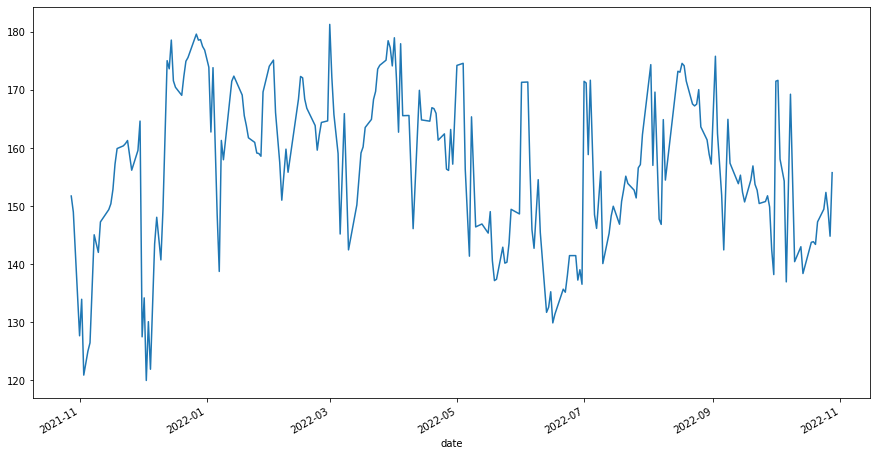

In [15]:
fig = plt.figure(figsize=(15,8))
df_year.plot()


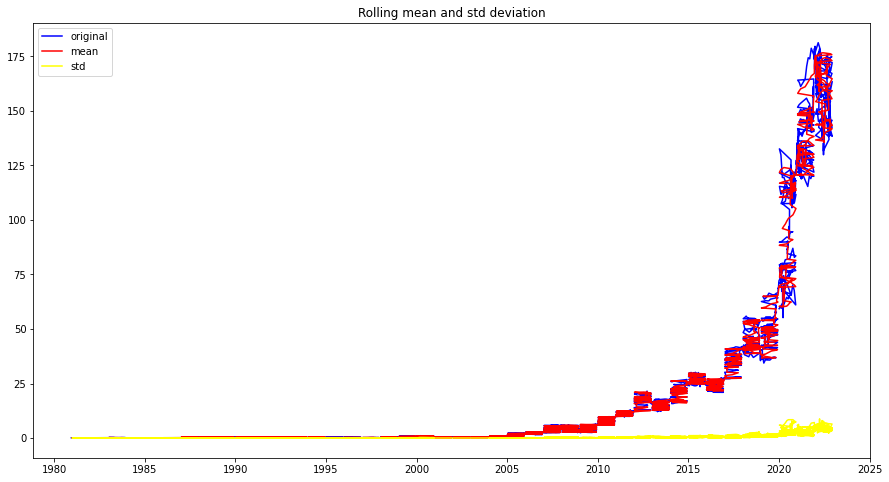

In [16]:
#determine rolling statistics
rolmean = df.rolling(12).mean()
rolstd = df.rolling(12).std()

plt.figure(figsize=(15,8))
fig = plt.figure(1)

orig = plt.plot(df['close'],color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='mean')
std = plt.plot(rolstd,color='yellow',label='std')
plt.legend(loc='best')
plt.title('Rolling mean and std deviation')
plt.show(block=False)

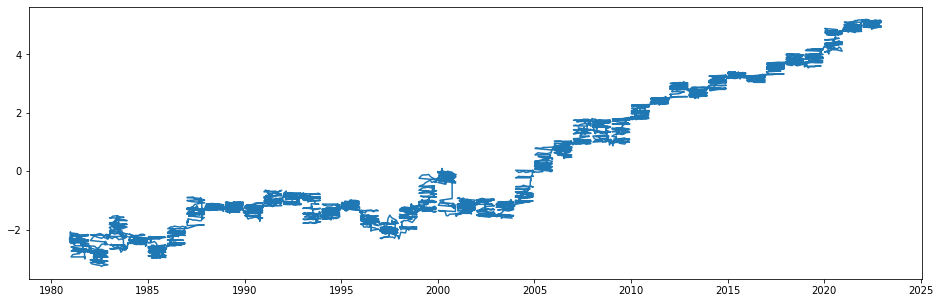

In [17]:
# Make a Series stationary
plt.figure(figsize=(16,5))
fig = plt.figure(1)

ts_log = np.log(df['close'])
plt.plot(ts_log)


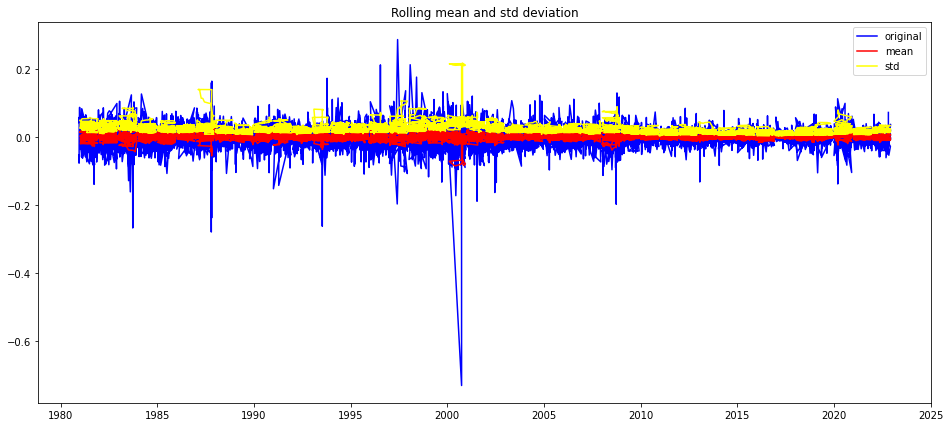

In [18]:
#differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()

rolmean = ts_log_diff.rolling(12).mean()
rolstd = ts_log_diff.rolling(12).std()



orig = plt.plot(ts_log_diff,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='mean')
std = plt.plot(rolstd,color='yellow',label='std')
plt.legend(loc='best')
plt.title('Rolling mean and std deviation')
plt.show(block=False)